In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dta=pd.read_csv("https://raw.githubusercontent.com/dhirajk100/DT-Classification/master/Decision-Tree-Classification-Data.csv")

In [3]:
dta.tail()

,age,bp,diabetes
982,45,87,0
983,40,83,0
984,40,83,0
985,40,60,1
986,45,82,0


In [4]:
# to decide inputs and target variables
# first drop the dependent variable column
inp = dta.drop('diabetes', axis = "columns")
inp.head()

,age,bp
0,65,65
1,45,82
2,35,73
3,45,90
4,50,68


In [5]:
# decide the target
target = dta['diabetes']
target

0      1
1      0
2      1
3      0
4      1
      ..
982    0
983    0
984    0
985    1
986    0
Name: diabetes, Length: 987, dtype: int64

In [6]:
target.shape

(987,)

In [7]:
dta.isnull().sum()

age         0
bp          0
diabetes    0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
le_age = LabelEncoder()
le_bp = LabelEncoder()

In [9]:
inp['age_n'] = le_age.fit_transform(inp['age'])
inp['bp_n'] = le_bp.fit_transform(inp['bp'])
inp

,age,bp,age_n,bp_n
0,65,65,9,7
1,45,82,5,17
2,35,73,3,12
3,45,90,5,22
4,50,68,6,9
...,...,...,...,...
982,45,87,5,20
983,40,83,4,18
984,40,83,4,18
985,40,60,4,4


In [10]:
inpt = inp.drop(['age','bp'], axis = 'columns')

In [11]:
inpt

,age_n,bp_n
0,9,7
1,5,17
2,3,12
3,5,22
4,6,9
...,...,...
982,5,20
983,4,18
984,4,18
985,4,4


In [12]:
from sklearn import tree

In [13]:
model = tree.DecisionTreeClassifier()

In [14]:
model.fit(inpt.values,target.values)

DecisionTreeClassifier()

In [15]:
model.score(inpt.values,target.values)

0.9422492401215805

In [16]:
prd = model.predict([[9,17], [3,22]])
print(prd)

[0 0]


In [17]:
print(inp.to_string())

     age   bp  age_n  bp_n
0     65   65      9     7
1     45   82      5    17
2     35   73      3    12
3     45   90      5    22
4     50   68      6     9
5     40   93      4    24
6     35   80      3    16
7     50   70      6    10
8     40   73      4    12
9     40   67      4     8
10    40   75      4    13
11    40   80      4    16
12    40   72      4    11
13    40   88      4    21
14    40   78      4    15
15    45   98      5    27
16    40   88      4    21
17    60   67      8     8
18    40   85      4    19
19    40   88      4    21
20    45   78      5    15
21    55   73      7    12
22    45   77      5    14
23    50   68      6     9
24    45   77      5    14
25    40   85      4    19
26    45   70      5    10
27    45   72      5    11
28    45   90      5    22
29    40   65      4     7
30    45   88      5    21
31    45   88      5    21
32    40   68      4     9
33    40   73      4    12
34    45   88      5    21
35    45   78      5    15
3

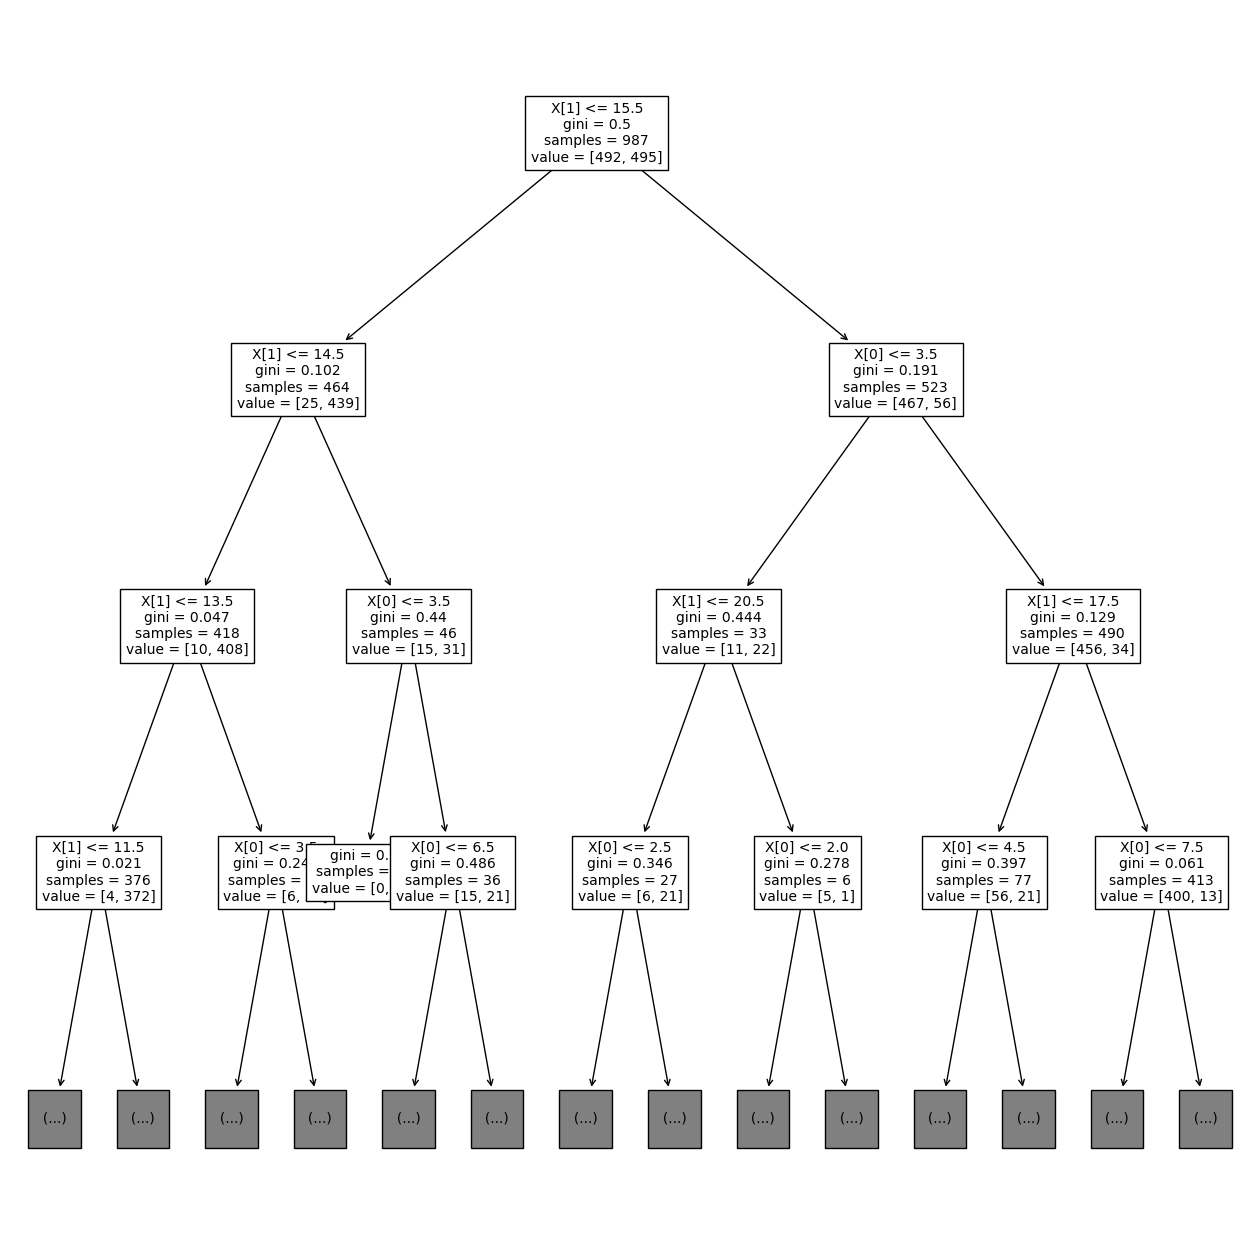

In [18]:
plt.subplots(figsize = (16,16))
tree.plot_tree(model,fontsize = 10,max_depth=3)
plt.show()

In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report([0,0],prd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

